In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
all_latam = pd.read_csv('ETA_AR_all_Latam.csv')
all_latam = all_latam[pd.to_numeric(all_latam['ETA'], errors='coerce').notnull()]
all_latam = all_latam[pd.to_numeric(all_latam['AR'], errors='coerce').notnull()]

# main_df = pd.read_csv('ETA_AR_SCA_Spignleton.csv')
main_df = pd.read_csv('ETA_AR_Latam.csv')
main_df = main_df[pd.to_numeric(main_df['ETA'], errors='coerce').notnull()]
main_df = main_df[pd.to_numeric(main_df['AR'], errors='coerce').notnull()]
# main_df = main_df[main_df.AR.apply(lambda x: x.isnumeric())]
# main_df = main_df[main_df.ETA.apply(lambda x: x.isnumeric())]

neg
781 0.5428433419014267
neg
1423 0.5678571428571428
neg
146 0.6973242492794535
positive
148 0.7856616839575715
positive
533 0.5453911737894793
neg
1315 0.7890109890109889
positive
805 0.6182648401826484
positive
1388 0.9288366336633662
neg
1390 0.8214285714285714
neg
1395 0.5541023425275008
positive
1275 0.6686390532544377


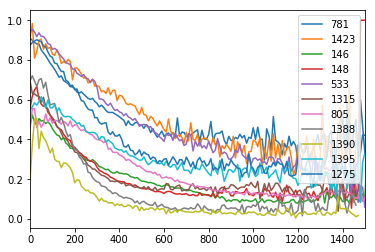

In [115]:
ETA_sensitivity = []
city_ids = set(main_df['city_id'])
positives_sens = []
negatives_sens = []
np_p = [148, 533, 805, 1275, 1388]
np_n = [146, 781, 1315, 1390, 1395, 1423]
for city_id in city_ids:
    df = main_df.loc[main_df['city_id'] == city_id]
#     df.plot('ETA', 'AR')
    x = list(df['ETA'].astype(float))
    y = list(df['AR'].astype(float))
    len_2 = int(len(y) / 2)
    middle_y = y[len_2]
    for i in range(len(x)):
        if x[i] > 700:
            middle_y = y[i]
            break
    eta_sens = (y[0] - middle_y)/y[0]
#     if city_id > 1000:
#         continue
    if city_id in np_p:
        positives_sens.append(eta_sens)
        plt.plot(x, y, label=city_id)
        print('positive')
    elif city_id in np_n:
        negatives_sens.append(eta_sens)
        print('neg')
        plt.plot(x, y, label=city_id)
    else:
        continue

    print(city_id, eta_sens)
    ETA_sensitivity.append((eta_sens, city_id))
    if (y[0] - y[len_2])/y[0] > 0.70:
#     if (y[0] - y[len_2])/y[0] < 0.50:
#         plt.plot(x, y, label=city_id)
        pass
plt.xlim(0, 1500)
plt.legend()
plt.show()

In [116]:
#best: 204, 929 (<0.5)
#worst: 801, 803, 1388, 1335
#remove 1388
for AR, city in sorted(ETA_sensitivity):
    print(city, AR)
print(positives_sens)
print(np.mean(positives_sens))
print(np.mean(negatives_sens))

781 0.5428433419014267
533 0.5453911737894793
1395 0.5541023425275008
1423 0.5678571428571428
805 0.6182648401826484
1275 0.6686390532544377
146 0.6973242492794535
148 0.7856616839575715
1315 0.7890109890109889
1390 0.8214285714285714
1388 0.9288366336633662
[0.7856616839575715, 0.5453911737894793, 0.6182648401826484, 0.9288366336633662, 0.6686390532544377]
0.7093586769695006
0.6620944395008473


1273 0.7336712978087941


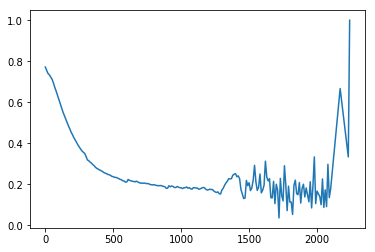

In [96]:
df = all_latam
x = list(df['ETA'].astype(float))
y = list(df['AR'].astype(float))
len_2 = int(len(y) / 2)
middle_y = y[len_2]
for i in range(len(x)):
    if x[i] > 700:
        middle_y = y[i]
        break
eta_sens = (y[0] - middle_y)/y[0]
print('all latam', eta_sens)
ETA_sensitivity.append((eta_sens, city_id))
if (y[0] - y[len_2])/y[0] > 0.70:
#     if (y[0] - y[len_2])/y[0] < 0.50:
    plt.plot(x, y, label=city_id)


In [117]:
AR_table = pd.read_csv('AR_in_LATAM_cities_between_2022-01-13_and_2022-01-27_-_Sheet1.csv')
AR_table = AR_table[pd.to_numeric(AR_table['AR'], errors='coerce').notnull()].reset_index()
lm = [204, 148, 803, 1275, 1325, 1359, 933, 1408, 1319, 1269, 805, 1273, 801, 789, 929]
lj = [204, 148, 803, 1275, 1325, 1359, 933, 1408, 1319, 805, 1315,144, 146, 929]
sca = [799, 458, 791, 795, 801, 789, 1273, 805, 1269, 146, 144, 1315, 929]
old_partitioning_cities = [805, 148, 204, 781, 144, 146, 533, 1408, 1315, 1359, 1395, 1379, 1388, 1325, 1390, 1423, 1335, 1275]
positive_subset = [148, 1408, 1379, 1388, 1390, 1423, 1335]
msca = list(set(sca) - set(lm))
jsca = list(set(sca) - set(lj))
print(msca, jsca)

positives = []
rest = []

m_ar = []
j_ar = []
j_s_ar = []
m_s_ar = []
for row in range(len(AR_table)):
    if AR_table['city_id'][row] in [1636]:
        print(1636, AR_table['AR'][row])
    if AR_table['city_id'][row] in lm:
        m_ar.append(AR_table['AR'][row])
    if AR_table['city_id'][row] in lj:
        j_ar.append(AR_table['AR'][row])
    if AR_table['city_id'][row] in msca:
        m_s_ar.append(AR_table['AR'][row])
    if AR_table['city_id'][row] in jsca:
        j_s_ar.append(AR_table['AR'][row])
    if AR_table['city_id'][row] in np_p:
        print('positive', AR_table['city_id'][row], AR_table['AR'][row])
        positives.append(AR_table['AR'][row])
    elif AR_table['city_id'][row] in np_n:
        rest.append(AR_table['AR'][row])
        print('neg', AR_table['city_id'][row], AR_table['AR'][row])

[1315, 458, 144, 146, 791, 795, 799] [801, 458, 789, 1269, 791, 1273, 795, 799]
1636 0.1262179312
neg 781 0.6186208108
positive 1275 0.4693539503
neg 1423 0.5504271681
neg 1390 0.08428207335000001
positive 1388 0.1807551434
positive 805 0.2299562423
neg 146 0.2155900544
neg 1395 0.3798114986
positive 148 0.25850405
positive 533 0.5706845119
neg 1315 0.2598648336


In [86]:
import numpy as np
print(np.median(AR_table['AR']))
print(np.median(m_ar))
print(np.median(m_s_ar))
print("Jiawei's Suggestion")
print(np.median(j_ar))
print(np.median(j_s_ar))


0.3739837398
0.35259961729999995
0.34074722420000003
Jiawei's Suggestion
0.29598973445
0.4132568647


In [118]:
print(np.median(positives))
print(np.median(rest))


0.25850405
0.31983816610000004


In [119]:
import numpy as np
print(np.mean(AR_table['AR']))
print(np.mean(m_ar))
print(np.mean(m_s_ar))
print("Jiawei's Suggestion")
print(np.mean(j_ar))
print(np.mean(j_s_ar))


0.39134098857930233
0.39553508488
0.35876412999999996
Jiawei's Suggestion
0.36572339650714286
0.41553095401249995
